##               Welcome to the Baruch AIS Data Analysis Workshop

### Part 1.1  Data Exploration and Cleaning of Transactions Worksheet

#### 1. Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import datetime

#### 2. Import and Explore datasets

In [2]:
df1= pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= 'Transactions', index_col = [0], 
                           parse_dates= ['transaction_date'])

df2= pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= 'CustomerDemographic', index_col = [0])

### Data Viewing

In [3]:
df1.head(3)

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0


In [4]:
df1.describe()

,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [5]:
df1.dtypes

product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [6]:
type(df1)

pandas.core.frame.DataFrame

In [7]:
df1.duplicated().sum()

0

In [8]:
df1.isnull().sum()

product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [9]:
df1.iloc[0:5, 0:4]

,product_id,customer_id,transaction_date,online_order
transaction_id,,,,
1,2,2950,2017-02-25,0.0
2,3,3120,2017-05-21,1.0
3,37,402,2017-10-16,0.0
4,88,3135,2017-08-31,0.0
5,78,787,2017-10-01,1.0


In [10]:
df1["product_id"].head()

transaction_id
1     2
2     3
3    37
4    88
5    78
Name: product_id, dtype: int64

In [12]:
new_df= df1[['product_id', 'order_status']].copy()

### Data Cleaning

In [13]:
print(df1.dropna().shape)
print(df1.shape)

(19445, 12)
(20000, 12)


In [14]:
df_trans= df1.dropna()

In [15]:
df_trans.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


### Part I.II: Analysis of Transaction Worksheet

#### 1. What is the most popular brand? 

In [16]:
Brand= df_trans['brand'].value_counts()
type(Brand)
print(Brand)

Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: brand, dtype: int64


#### Pie Chart to demonstrate - Rule of Thumb - no more than 5 categories, we make an exception!

In [17]:
## Convert Pandas Series to 1D- array
x= Brand.values
type(x)
print(x)

[4169 3245 3244 2993 2931 2863]


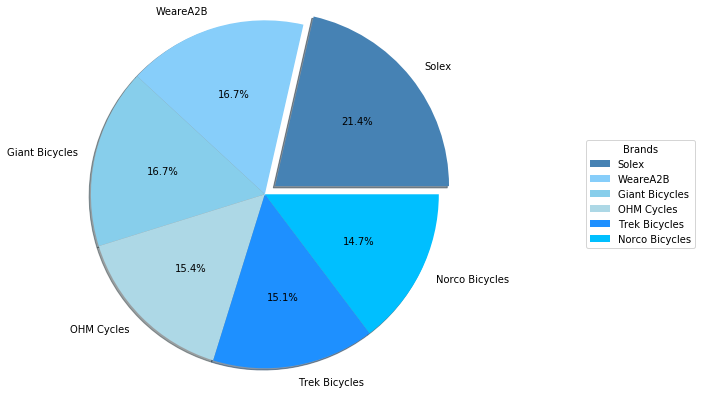

In [18]:
# Define labels

x= Brand.values

fig, ax = plt.subplots(figsize=(7, 4))

Labels = ['Solex', 'WeareA2B', 'Giant Bicycles', 'OHM Cycles', 'Trek Bicycles', 'Norco Bicycles']

#Define colors

colors= np.array(['steelblue','lightskyblue','skyblue', 'lightblue', 'dodgerblue', 'deepskyblue'])

#number labels
explode = (0.15, 0, 0, 0, 0, 0)

plt.pie(x, explode= explode, labels= Labels, colors= colors, radius= 2,
       shadow = True, autopct='%1.1f%%')

#ax.set_title("Product Lines")


#wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  #textprops=dict(color="w"))

ax.legend(Labels, title="Brands", loc="center right",bbox_to_anchor=(1.5, 0, 1, 1))

plt.show()

#### 2. Which brand was most profitable?

In [19]:
df_trans['profit']= df_trans['list_price']- df_trans['standard_cost']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_trans.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
transaction_id,,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


In [21]:
df_trans['profit']= df_trans['profit'].round(0)
df_trans.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
transaction_id,,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,18.0
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1703.0
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1545.0
4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.0
5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1056.0


In [22]:
Brand_Profit= df_trans[['brand', 'profit']]
Brand_Profit.head()

,brand,profit
transaction_id,,
1,Solex,18.0
2,Trek Bicycles,1703.0
3,OHM Cycles,1545.0
4,Norco Bicycles,817.0
5,Giant Bicycles,1056.0


In [30]:
z = Brand_Profit.groupby("brand").sum()
z.head()
z.index

Index(['Giant Bicycles', 'Norco Bicycles', 'OHM Cycles', 'Solex',
       'Trek Bicycles', 'WeareA2B'],
      dtype='object', name='brand')

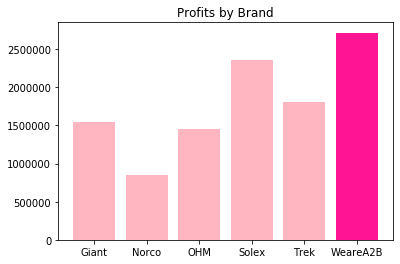

In [33]:
x= ['Giant', 'Norco', 'OHM', 'Solex', 'Trek', 'WeareA2B']  #z.index
y= z['profit'] #[1541412., 853446.,1453484., 2355335., 1807209.,2717364.]

plt.title("Profits by Brand")

colors = np.array(['lightpink', 'lightpink', 'lightpink', 'lightpink', 'lightpink', 'deeppink'])


plt.bar(x, y, color= colors)
plt.show()

#### 3. Which month was most profitable?

In [34]:
df_trans.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
transaction_id,,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,18.0
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1703.0
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1545.0
4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.0
5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1056.0


In [35]:
df_trans["Month"]= df_trans["transaction_date"].apply(lambda x: x.month)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_trans.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,Month
transaction_id,,,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,18.0,2
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1703.0,5
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1545.0,10
4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.0,8
5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1056.0,10


In [37]:
s = df_trans[['profit', 'Month']]
s.head()

,profit,Month
transaction_id,,
1,18.0,2
2,1703.0,5
3,1545.0,10
4,817.0,8
5,1056.0,10


In [39]:
Sales_by_months = s.groupby("Month").sum()
Sales_by_months

,profit
Month,
1,915111.0
2,852467.0
3,865266.0
4,888809.0
5,903940.0
6,841763.0
7,919621.0
8,951335.0
9,843692.0


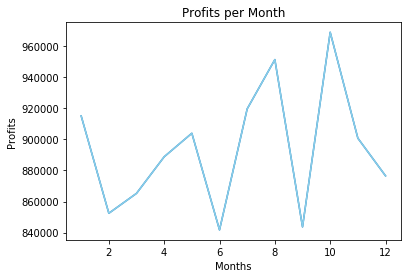

In [44]:
x1= Sales_by_months.index
y1 = Sales_by_months["profit"]

fig, ax = plt.subplots()
ax.plot(x1, y1)

line= ax.plot(x1, y1, color= 'skyblue')


ax.set(xlabel='Months', ylabel='Profits',
       title='Profits per Month')

plt.show()

In [43]:
Sales_by_months.profit.max()

968927.0

### Part 2.1: Clean and Explore Customer Worksheet

In [45]:
df2.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [46]:
df_Cust= df2.drop(columns = ["first_name", "last_name", "deceased_indicator", "default"])
df_Cust.head()

,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
customer_id,,,,,,,,
1,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes,16.0
3,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,Yes,15.0
4,Male,33,1961-10-03,NaN,IT,Mass Customer,No,7.0
5,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,Yes,8.0


In [47]:
df_Cust.shape

(4000, 8)

In [52]:
df_Cust.gender.value_counts()

Female       2039
Male         1873
Undefined      88
Name: gender, dtype: int64

#### Standardize the gender column

In [49]:
df_Cust.gender.replace({"U": "Undefined", "Femal": "Female", "M": "Male", "F": "Female"}, inplace= True)

In [51]:
df_Cust.gender.value_counts()

Female       2039
Male         1873
Undefined      88
Name: gender, dtype: int64

### Part 2.2 : Analysis of Customer Worksheet

#### 1. 	Which age group spent most money on products based on 2017 Transactions?

#### Change the DOB to age

In [53]:
def get_age(df):
    now = datetime.datetime.now()   #returns today's date
    df['age']= now.year - pd.DatetimeIndex(df['DOB']).year
    df.drop(columns=["DOB"], inplace=True)
    return df['age']

In [54]:
get_age(df_Cust)
df_Cust.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age
customer_id,,,,,,,,
1,Female,93,Executive Secretary,Health,Mass Customer,Yes,11.0,67.0
2,Male,81,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,40.0
3,Male,61,Recruiting Manager,Property,Mass Customer,Yes,15.0,66.0
4,Male,33,NaN,IT,Mass Customer,No,7.0,59.0
5,Female,56,Senior Editor,NaN,Affluent Customer,Yes,8.0,43.0


In [56]:
df_Cust.age.max()

177.0

In [57]:
def age_to_category(df):
    bins = [18, 25, 35, 60, 100]
    group_names= ['Youth', 'Young-Adult', 'Middle-Aged', 'Senior']
    df['category'] = pd.cut(df['age'], bins, labels = group_names)
    return (df.head())

In [58]:
age_to_category(df_Cust)

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,category
customer_id,,,,,,,,,
1,Female,93,Executive Secretary,Health,Mass Customer,Yes,11.0,67.0,Senior
2,Male,81,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,40.0,Middle-Aged
3,Male,61,Recruiting Manager,Property,Mass Customer,Yes,15.0,66.0,Senior
4,Male,33,NaN,IT,Mass Customer,No,7.0,59.0,Middle-Aged
5,Female,56,Senior Editor,NaN,Affluent Customer,Yes,8.0,43.0,Middle-Aged


In [60]:
df1_df2= pd.merge(df_Cust, df_trans, how= 'inner', on = 'customer_id')

In [61]:
df1_df2

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age,category,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,Month
0,1,Female,93,Executive Secretary,Health,Mass Customer,Yes,11.0,67.0,Senior,...,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,111.0,12
1,1,Female,93,Executive Secretary,Health,Mass Customer,Yes,11.0,67.0,Senior,...,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,751.0,4
2,1,Female,93,Executive Secretary,Health,Mass Customer,Yes,11.0,67.0,Senior,...,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,189.0,5
3,1,Female,93,Executive Secretary,Health,Mass Customer,Yes,11.0,67.0,Senior,...,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,90.0,1
4,1,Female,93,Executive Secretary,Health,Mass Customer,Yes,11.0,67.0,Senior,...,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,18.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19437,3500,Female,71,NaN,Entertainment,Affluent Customer,No,17.0,53.0,Middle-Aged,...,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0,198.0,1
19438,3500,Female,71,NaN,Entertainment,Affluent Customer,No,17.0,53.0,Middle-Aged,...,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0,827.0,2
19439,3500,Female,71,NaN,Entertainment,Affluent Customer,No,17.0,53.0,Middle-Aged,...,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,33888.0,144.0,8
19440,3500,Female,71,NaN,Entertainment,Affluent Customer,No,17.0,53.0,Middle-Aged,...,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,15.0,1


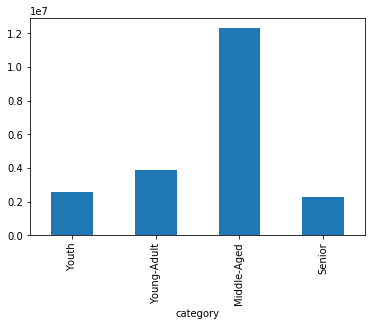

In [67]:
gb= df1_df2.groupby('category')['list_price'].sum()

gb.plot(kind = 'bar')

####  2. Which gender bought spent more?


In [ ]:
Gender= df1_df2[['gender', 'list_price']]
Gender.head()

In [ ]:
grouped1= Gender.groupby('gender').sum()
grouped1.head()

In [ ]:
x3= grouped1.index
y3= grouped1.list_price

plt.title("By Gender")

colors = np.array(['lightpink', 'lightpink', 'deeppink'])

#plt.xlabel(labels, fontweight='bold', color = 'orange', fontsize='9', horizontalalignment='center')

plt.bar(x3, y3, color= colors)
plt.show()